# Membaca dataset kualitas air

Membaca data dari sebuah file CSV yang berisi informasi tentang kualitas air menggunakan library Pandas, dan menampilkan 5 baris pertama dari file tersebut

In [1]:
import pandas as pd

# Ganti 'your_file.csv' dengan path ke file CSV Anda
file_path = '../Dataset/water_potability.csv'

# Membaca file CSV ke dalam DataFrame pandas
df = pd.read_csv(file_path)

# Menampilkan lima baris pertama dari DataFrame
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Mengatasi Empty Fields

Menghapus setiap baris yang kosong dan membandingkan jumlah sebelum dan sesudah penghapusan

In [4]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Pembersihan dan Pemodifikasian Data

melakukan beberapa operasi untuk membersihkan dan memodifikasi data pada DataFrame yang dibaca sebelumnya.

Pertama, kode membulatkan nilai kolom 'ph' menjadi satu desimal. Kemudian, nilai desimal dihapus dari kolom-kolom selain 'ph' dan 'potabilitas', sehingga menghasilkan nilai bulat. Selanjutnya, satu digit terakhir dari kolom 'Solids' dihapus. Setelah semua modifikasi, DataFrame ditampilkan dengan lima baris pertama untuk memeriksa hasilnya.

Operasi ini bertujuan untuk memastikan data siap digunakan untuk analisis lebih lanjut, dengan nilai yang sudah dibulatkan dan format yang konsisten.

In [6]:
# Membulatkan nilai dalam kolom 'ph' menjadi satu desimal
df['ph'] = df['ph'].round(1)

# Menghapus nilai desimal di kolom-kolom selain 'ph' dan 'potabilitas'
for col in df.columns:
    if col not in ['ph', 'Potability']:
        df[col] = df[col].astype(str).str.split('.').str[0].astype(int)

# Menghapus satu digit dari kolom Solids
df["Solids"] = df["Solids"].astype(str).str.slice(0, -1).astype(int)

# Menampilkan lima baris pertama dari DataFrame setelah dimodifikasi
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.1,204,2079,7,368,564,10,86,2,0
1,3.7,129,1863,6,333,592,15,56,4,0
2,8.1,224,1990,9,333,418,16,66,3,0
3,8.3,214,2201,8,356,363,18,100,4,0
4,9.1,181,1797,6,310,398,11,31,4,0


# Visualisasi perbandingan jumlah data potabilitas air

Histogram ini membantu dalam memahami sebaran data potabilitas air minum dalam dataset. Setelahnya, jumlah baris yang spesifik untuk nilai potabilitas 0 (tidak aman) dan 1 (aman) juga ditampilkan untuk memberikan informasi jumlah spesifiknya.

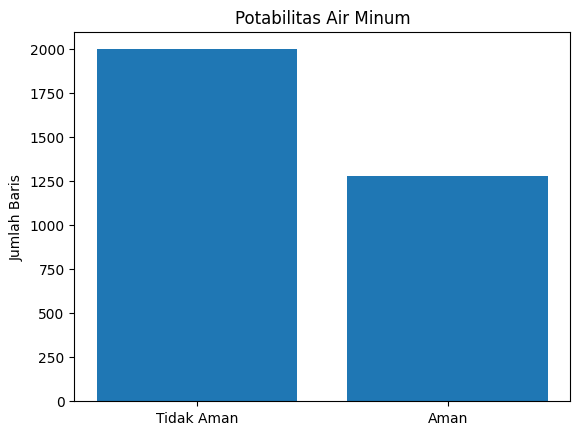

Jumlah spesifik 0 pada potabilitas = 1998
Jumlah spesifik 1 pada potabilitas = 1278


In [7]:
import matplotlib.pyplot as plt

# Hitung jumlah baris pada kolom Potability dengan nilai 0
jumlah_0 = df["Potability"].value_counts()[0]

# Hitung jumlah baris pada kolom Potability dengan nilai 1
jumlah_1 = df["Potability"].value_counts()[1]

# Buat data untuk histogram
data = [jumlah_0, jumlah_1]

# Buat label untuk sumbu x
labels = ["Tidak Aman", "Aman"]

# Buat histogram
plt.bar(labels, data)

# Tambahkan judul
plt.title("Potabilitas Air Minum")

# Tambahkan label sumbu y
plt.ylabel("Jumlah Baris")

# Tampilkan plot
plt.show()

print(f'Jumlah spesifik 0 pada potabilitas = {jumlah_0}')
print(f'Jumlah spesifik 1 pada potabilitas = {jumlah_1}')

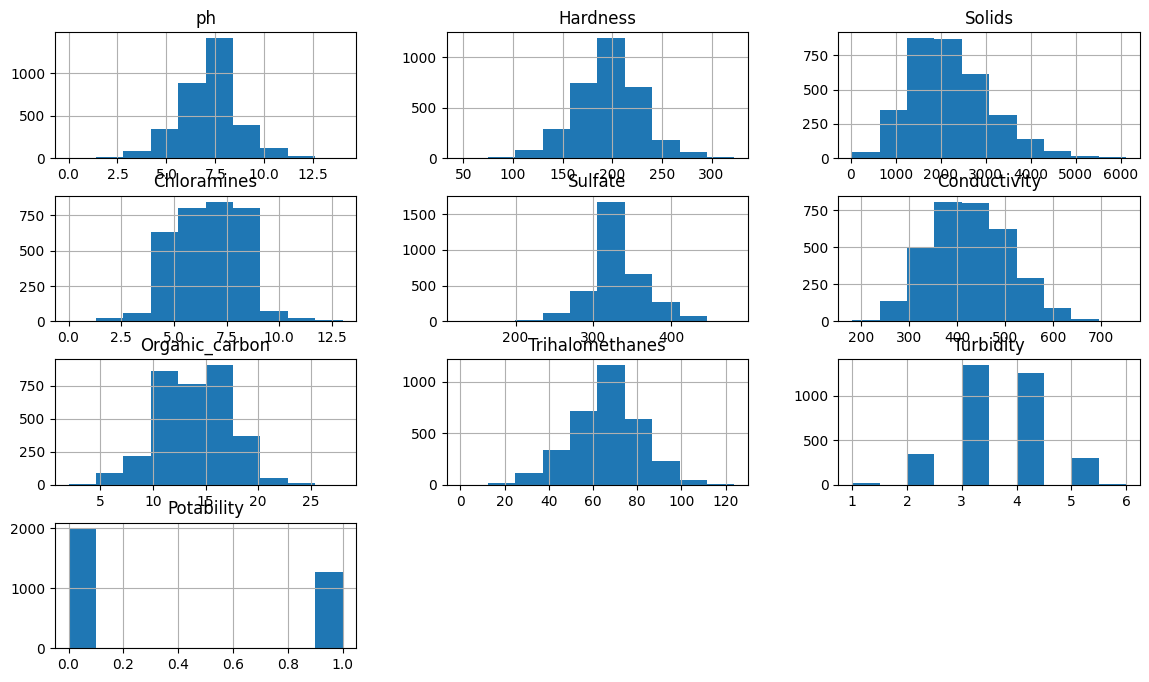

In [9]:
df.hist(figsize=(14,8))
plt.show()

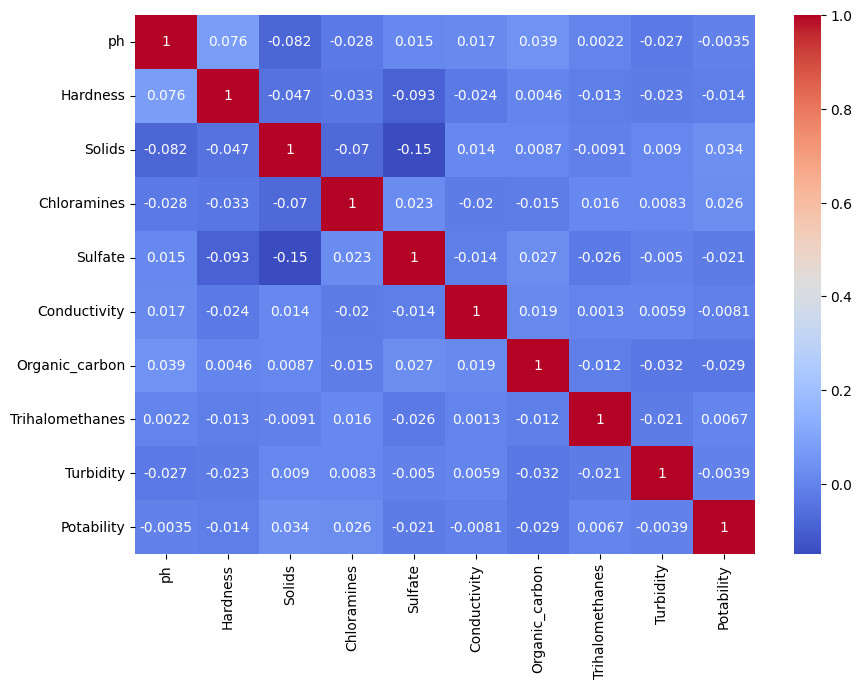

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 7)) #ukuran gambar 10x7
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") #tampilin korelasi antar data
plt.show()

### Save dataset yang telah siap di prepare

In [8]:
# Menyimpan DataFrame yang telah dimodifikasi ke dalam file CSV baru
df.to_csv('../Dataset/normalized_data.csv', index=False)

print("Dataset telah disimpan ke '../Dataset/normalized_data.csv'")

Dataset telah disimpan ke '../Dataset/normalized_data.csv'
